# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [69]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
sns.set
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') #this would remove any deprecated warning

# Load Data

In [58]:
df = pd.read_csv('data/human_body_temperature.csv')
print("Data: " + str(df.shape))

Data: (130, 3)


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


The above shows that the data set has 3 columns and 130 rows of observations. There are no null values in any of the columns.

In [60]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [61]:
df['temperature'].describe()

count    130.000000
mean      98.249231
std        0.733183
min       96.300000
25%       97.800000
50%       98.300000
75%       98.700000
max      100.800000
Name: temperature, dtype: float64

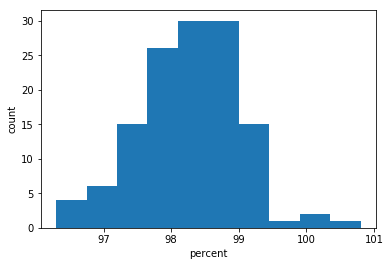

In [62]:
_ = plt.hist(df['temperature'])
_ = plt.xlabel('percent')
_ = plt.ylabel('count')
plt.show()

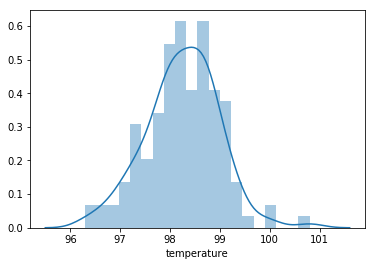

In [63]:
sns.distplot(df['temperature'], bins=20)
plt.show()

Looking at both histogram above, it looks like the graph follows a normal distribution. It has a single peak.

**QUESTION:** Which plot above is better? Can we tell normal distribution right away?

# Making an ECDF (Empirical Cumulative Distribution Function)

In [64]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements"""
    
    # Number of data points: n
    n = len(data)
    
    # x-data for the ECDF: x
    x = np.sort(data)
    
    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n
    
    return x, y

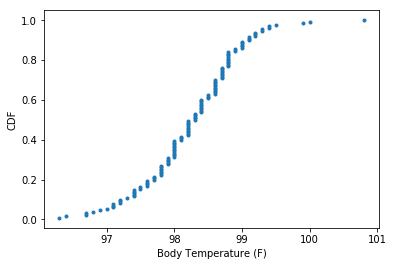

In [65]:
x, y = ecdf(df['temperature'])
_ = plt.plot(x, y, marker=".", linestyle="none")
_ = plt.xlabel("Body Temperature (F)")
_ = plt.ylabel("CDF")

# Use Bootstrapping to Generate 10,000 Temperatures that Follow a Normal Distribution

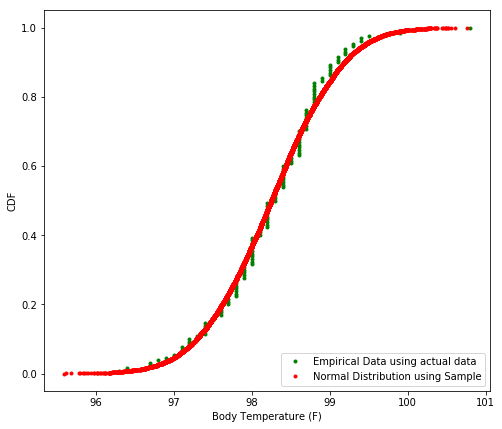

In [78]:
x, y = ecdf(df['temperature'])
plt.figure(figsize=(8,7))
_ = plt.plot(x, y, marker=".", linestyle="none", color='green')
_ = plt.xlabel("Body Temperature (F)")
_ = plt.ylabel("CDF")

mean = np.mean(df['temperature'])
std = np.std(df['temperature'])
samples = np.random.normal(mean, std, size=10000)
x_theor, y_theor = ecdf(samples)
_ = plt.plot(x_theor, y_theor, marker=".", linestyle="none", color='red')
_ = plt.legend(('Empirical Data using actual data', 'Normal Distribution using Sample'), loc='lower right')

# Answer to Question 1: Is the distribution of body temperatures normal?

Based on the chart above, the temperate data set is very close to the normal distribution CDF. Hence we can conclude that the distribution of body temperatures **is normal**.



# Question 2: Is the sample size large? Are the observations independent?

* The sample size has 130 observations. It's large enough to produce a normal distribution.
* It's random. The dataset is randomly picked. There's no indication that the observations were not random.
* It's independent. There no indication that the data is bein replaced after being picked.
* Since we do not know the population mean and standard deviation, we'll use the sample mean, standard deviation and T table to calculate the statistics.

# Question 3: Is the true population mean really 98.6 degrees F?
* First, try a bootstrap hypothesis test.
* Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
* In this situation, is it appropriate to use the  tt  or  zz  statistic?
* Now try using the other test. How is the result be different? Why?

## Using Bootstrapping Method

In [67]:
# Use bootstrapping to resample data to perform statistical inference
# Bootstrap sample - a resampled array of the data
# Bootstrap replicate - a statistic computed from the resampled array, e.g. mean

# Function to resample data and calculate the mean or std dev, whatever it passed into func
def bootstrap_replicate_1D_data(data, func):
    """Generate bootstrap replicate of 1D data"""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample) #func can be mean, std dev etc

# function to calculate bootstrap replicate N times
def calc_bootstrap_replicate_n_times(data, func, size=1):
    """Draw from bootstrap replicate"""
    
    # initialize array of replicates
    bs_replicates = np.empty(size)
    
    # generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1D_data(data, func)
    
    #return bs_replicates array
    return bs_replicates

# Calculate 10,000 bootstrap replicates mean
bs_replicates = calc_bootstrap_replicate_n_times(df['temperature'], np.mean, 10000)
bs_mean = np.mean(bs_replicates)

# Compute the 95% confidence interval
bs_conf_interval = np.percentile(bs_replicates, [2.5, 97.5])

print("----- BOOTSTRAPPING METHOD RESULTS -----")
print('The bootstrap replicate mean is: ' + str(bs_mean))
print('95% confidence interval of body temperate is: ' + str(bs_conf_interval))

----- BOOTSTRAPPING METHOD RESULTS -----
The bootstrap replicate mean is: 98.25002692307693
95% confidence interval of body temperate is: [98.12230769 98.37769231]


## Using Frequentist Statistical Testing Method

*Null Hypothesis* - the true population mean is 98.6F

*Alternative Hypothesis* - the true population mean is NOT 98.6F

*One-sample* - One sample test should be used to test significance of the result because the there's only 1 group of data

*Z Test* - Use z-test because the sample size is greater than 30.

In [80]:
#z score
print('Mean of temperate: ' + str(mean))
print('Standard deviation of temperature is: ' + str(std))

Mean of temperate: 98.24923076923078
Standard deviation of temperature is: 0.7303577789050377


For a 95% confidence interval, using the z table, look up 0.975 and the z score is 0.06.

In [88]:
print('Confident 95% chance that P (population mean) is within 0.06 of the sample mean: ' + str(mean - 0.06) + ' and ' + str(mean + 0.06))

Confident 95% chance that P (population mean) is within 0.06 of the sample mean: 98.18923076923078 and 98.30923076923078


# Conclusion to Question 3
Looks like using the bootstrapping method vs the frequentist statistical testing method produce very similar results. In both cases, the TRUE population mean doesn't fall within the 95% confidence interval range. Hence the true population mean is not 98.6F.

# Question 4: Draw a small sample of size 10 from the data and repeat both frequentist tests.
* Which one is the correct one to use?
* What do you notice? What does this tell you about the difference in application of the  tt  and  zz  statistic?

In [95]:
# Draw a small sample size of 10
df10 = df.sample(10)
df10

,temperature,gender,heart_rate
123,97.2,F,66.0
36,99.1,M,71.0
0,99.3,F,68.0
79,97.6,M,74.0
31,97.6,F,61.0
9,98.6,F,86.0
113,99.1,F,74.0
110,98.8,F,69.0
46,97.4,M,72.0
128,97.9,M,72.0


## Using the Bootstrapping Method

In [96]:
# Calculate 10,000 bootstrap replicates mean
bs_replicates = calc_bootstrap_replicate_n_times(df10['temperature'], np.mean, 10000)
bs_mean = np.mean(bs_replicates)

# Compute the 95% confidence interval
bs_conf_interval = np.percentile(bs_replicates, [2.5, 97.5])

print("----- BOOTSTRAPPING METHOD RESULTS -----")
print('The bootstrap replicate mean is: ' + str(bs_mean))
print('95% confidence interval of body temperate is: ' + str(bs_conf_interval))

----- BOOTSTRAPPING METHOD RESULTS -----
The bootstrap replicate mean is: 98.262418
95% confidence interval of body temperate is: [97.8  98.73]


## Using Frequentist Statistical Testing Method Using T-score

In [98]:
mean10 = np.mean(df10['temperature'])
std10 = np.std(df10['temperature'])
print('Mean of temperate: ' + str(mean10))
print('Standard deviation of temperature is: ' + str(std10))

Mean of temperate: 98.26
Standard deviation of temperature is: 0.7592101158440898


For a 95% confidence interval, using the z table, look up 0.025 with degree of freedom = 9. The t-value = 2.262.

In [114]:
print("----- Using Frequentist Statistical Testing Method -----")
print('95% confidence interval of body temperate is: ' + str(mean10 - (2.262 + std10/math.sqrt(len(df10)))) + ' and ' + str(mean10 + (2.262 + std10/math.sqrt(len(df10)))))

----- Using Frequentist Statistical Testing Method -----
95% confidence interval of body temperate is: 95.75791668112925 and 100.76208331887076


## Question 4 Conclusion
For a sample size of 10, both bootstrapping method and frequentist Statistical Testing Method using t-score produced very different results. The results were more similar when a z-score was used.

# Question 5: At what temperature should we consider someone's temperature to be "abnormal"?
* As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
* Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.

Formula
---------
* Margin of Error = Critical value * Standard Error
* Standard Error = Standard Deviation / sq root of sample size

## Using the Bootstrapping Method

In [126]:
# Calculate 1 bootstrap replicates mean
bs_replicates = calc_bootstrap_replicate_n_times(df['temperature'], np.mean, 1)
bs_mean = np.mean(bs_replicates)

# Compute the 95% confidence interval
bs_conf_interval = np.percentile(bs_replicates, [2.5, 97.5])

print("----- BOOTSTRAPPING METHOD RESULTS -----")
print('The bootstrap replicate mean is: ' + str(bs_mean))
print('95% confidence interval of body temperate is: ' + str(bs_conf_interval))

----- BOOTSTRAPPING METHOD RESULTS -----
The bootstrap replicate mean is: 98.25769230769231
95% confidence interval of body temperate is: [98.25769231 98.25769231]


## Using Frequentist Statistical Testing Method Using Z-score

In [119]:
std = np.std(df['temperature'])
mean = np.mean(df['temperature'])
n = len(df)
std_error = std / math.sqrt(n)

Use Z Score. Assume 95% confidence interval.
* α = 100% -95% = 5%
* Divide α/2 = 0.05/2 = 0.025
* Substract α/2 from 1 = 0.975 (use this to look up critical value in the z table)
* Critical value is 1.96


In [121]:
margin_of_error = 1.96 * std_error
print('Margin of Error is: ' + str(margin_of_error))

Margin of Error is: 0.125550964802579


In [127]:
print('---- Frequentist Statistical Testing Method Results ----')
print('95% confidence interval for the mean human temperate is between ' + str(mean - margin_of_error) + ' and ' + str(mean + margin_of_error))

---- Frequentist Statistical Testing Method Results ----
95% confidence interval for the mean human temperate is between 98.12367980442819 and 98.37478173403336


## Question 5 Conclusion
Based on the above results, bootstrap vs frequentist statistical method, with a confidence level of 95%, temperatures below 98.12 and above 98.37 are considered abnormal.

# Question 6: Is there a significant difference between males and females in normal temperature?
* What testing approach did you use and why?
* Write a story with your conclusion in the context of the original problem.

## Hypothesis
* Ho - there is no difference betweek males and females normal temperature
* H1 - there is a difference betweek males and females normal temperature

In [128]:
male = df[df.gender == 'M']
female = df[df.gender == 'F']

65
65


In [132]:
male_mean_temp = np.mean(male['temperature'])
female_mean_temp = np.mean(female['temperature'])
print('Mean temperate for Male is ' + str(male_mean_temp))
print('Mean temperate for Female is ' + str(female_mean_temp))

Mean temperate for Male is 98.1046153846154
Mean temperate for Female is 98.39384615384613


In [133]:
# Calculate the difference of means
difference_in_temp_means = female_mean_temp - male_mean_temp
print('Difference between female and male mean temperatures is: ' + str(difference_in_temp_means))

Difference between female and male mean temperatures is: 0.289230769230727


In [135]:
# Calculate the variance of the difference of means and the standard deviation
variance_of_difference = np.var(male['temperature'])/len(male) + np.var(female['temperature'])/len(female)
std_dev_of_difference = math.sqrt(variance_of_difference)

In [136]:
# For a 95% confidence interval, the z-score is 1.96.
p_value = 1.96 * std_dev_of_difference
print(p_value)

0.24613030301613179


## Conclusion for Question 6
Using a hypothesis significance testing with a confidence level of 95%, since the p-value is less than α of 5%, we need to reject the null hypothesis because there is a significant difference between the mean temperate between males and females.